In [20]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [22]:
img=image.load_img(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\5_July\4_7_July_OpenCV\Happy_sad\training\happy\Modi.jpg')

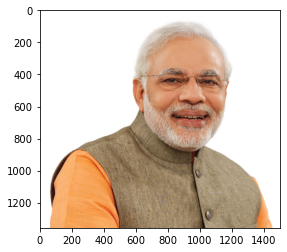

In [23]:
plt.imshow(img)

In [24]:
i1= cv2.imread(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\5_July\4_7_July_OpenCV\Happy_sad\training\happy\Modi.jpg')
i1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
i1.shape  

(1358, 1500, 3)

In [26]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [27]:
train_dataset=train.flow_from_directory(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\5_July\4_7_July_OpenCV\Happy_sad\training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\5_July\4_7_July_OpenCV\Happy_sad\validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 111 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [28]:
 train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [29]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [41]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset) 

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 1.8967 - acc: 0.5556 - val_loss: 0.8776 - val_acc: 0.4615
Epoch 2/10
3/3 [==============================] - 3s 949ms/step - loss: 0.3987 - acc: 0.6667 - val_loss: 1.5558 - val_acc: 0.4615
Epoch 3/10
3/3 [==============================] - 3s 962ms/step - loss: 0.6407 - acc: 0.7778 - val_loss: 0.7839 - val_acc: 0.4231
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.4600 - acc: 0.7778 - val_loss: 2.0815 - val_acc: 0.4615
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.3607 - acc: 0.8889 - val_loss: 2.1453 - val_acc: 0.4615
Epoch 6/10
3/3 [==============================] - 3s 949ms/step - loss: 1.2231 - acc: 0.6667 - val_loss: 0.7211 - val_acc: 0.5385
Epoch 7/10
3/3 [==============================] - 3s 959ms/step - loss: 0.8646 - acc: 0.6667 - val_loss: 0.6937 - val_acc: 0.6154
Epoch 8/10
3/3 [==============================] - 4s 1s/step - loss: 0.4303 - acc: 0.8889 - val_los

In [38]:
history.history??

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 2.7805 - acc: 0.5556 - val_loss: 0.8273 - val_acc: 0.4231
Epoch 2/10
3/3 [==============================] - 3s 979ms/step - loss: 0.3682 - acc: 0.7778 - val_loss: 0.9256 - val_acc: 0.4615
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.6017 - acc: 0.7778 - val_loss: 1.0744 - val_acc: 0.3846
Epoch 4/10
3/3 [==============================] - 3s 959ms/step - loss: 0.1696 - acc: 0.8889 - val_loss: 0.9432 - val_acc: 0.4231
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.3171 - acc: 0.7778 - val_loss: 1.1868 - val_acc: 0.4615
Epoch 6/10
3/3 [==============================] - 3s 978ms/step - loss: 0.1584 - acc: 1.0000 - val_loss: 1.1449 - val_acc: 0.3846
Epoch 7/10
3/3 [==============================] - 3s 986ms/step - loss: 0.7063 - acc: 0.7778 - val_loss: 1.5538 - val_acc: 0.3462
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 0.1939 - acc: 0.8889 - val_los

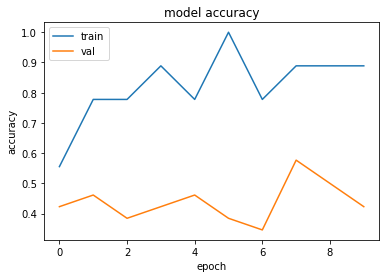

In [45]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

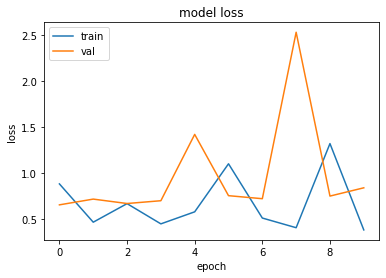

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()